In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [30]:
mushrooms_df = pd.read_csv("https://stepik.org/media/attachments/course/4852/training_mush.csv")
mushrooms_df.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,2,0,3,1,5,1,0,0,9,1,...,3,7,0,2,1,4,3,5,0,0
1,2,0,4,0,5,1,0,1,10,0,...,7,4,0,2,1,0,7,4,0,1
2,2,0,3,0,2,1,0,0,7,0,...,0,4,0,2,1,2,1,5,1,1
3,0,0,3,0,5,1,1,0,2,0,...,7,7,0,2,2,4,7,3,1,0
4,2,3,3,1,5,1,0,0,10,1,...,3,6,0,2,1,4,2,5,0,0



# №1
Переберите параметры с помощью GridSearchCV и обучите Random Forest на данных, указанных в предыдущем стэпе. Передайте в GridSearchCV модель с указанием random_state
```Python
RandomForestClassifier(random_state=0)
```
Параметры для выбора:
- n_estimators: от 10 до 50 с шагом 10
- max_depth: от 1 до 12 с шагом 2
- min_samples_leaf: от 1 до 7
- min_samples_split: от 2 до 9 с шагом 2

Укажите cv=3. Для ускорения расчётов в GridSearchCV можно указать n_jobs=-1, чтобы использовать все процессоры.

Какие параметры Random Forest были отобраны как наилучшие для решения на этих данных?


In [31]:
clf_rf = RandomForestClassifier(random_state=0)

In [32]:
parameters = {
    "n_estimators": range(10, 51, 10),
    "max_depth": range(1, 13, 2),
    "min_samples_leaf": range(1, 8),
    "min_samples_split": range(2, 10, 2)
}

search = GridSearchCV(clf_rf, parameters, cv=3, n_jobs=-1)

In [33]:
X = mushrooms_df.drop(["class"], axis=1)
y = mushrooms_df["class"]

search.fit(X, y)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': range(1, 13, 2),
                         'min_samples_leaf': range(1, 8),
                         'min_samples_split': range(2, 10, 2),
                         'n_estimators': range(10, 51, 10)})

In [34]:
search.best_params_

{'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

# №2
Выберите правильные утверждения о важности фичей для нашего классификатора:
- cap-surface > odor > gill-attachment
- odor > population > gill-attachment
- habitat > stalk-shape > odor
- stalk-color-below-ring > stalk-root > odor 

In [35]:
feature_importances = search.best_estimator_.feature_importances_
feature_importances_df = pd.DataFrame({
    "Feature": list(X),
    "Feature importances": feature_importances
})

feature_importances_df = feature_importances_df.sort_values(
    "Feature importances", 
    ascending=False
)

feature_importances_df

,Feature,Feature importances
4,odor,0.188376
8,gill-color,0.103861
10,stalk-root,0.103793
19,spore-print-color,0.083564
6,gill-spacing,0.080840
18,ring-type,0.070726
3,bruises,0.070109
7,gill-size,0.068461
12,stalk-surface-below-ring,0.048296
20,population,0.043783


# №3
Теперь у нас есть классификатор, определяющий какие грибы съедобные, а какие нет, испробуем его! Предскажите съедобность этих грибов и напишите в ответ число несъедобных грибов (класс равен 1).

 

Заметьте, что для использования этого леса на новых грибах, нам нужно будет заполнить значения параметров гриба, часть из которых определить проще (например, цвет шляпки), а для определения части понадобится специалист-миколог.
То есть в этом случае нам придётся самим экстрагировать признаки из объекта. Для зрительных признаков типа формы, цвета можно использовать более сложную модель (например, свёрточную нейронную сеть) и подавать на вход фотки гриба. И модель сама извлечёт признаки вместо того, чтобы нам описывать самим. Но одной фоткой тут не отделаешься - для определения запаха понадобится ещё детектор


In [36]:
test_mushrooms_df = pd.read_csv("../../../Datasets/testing_mush.csv")

In [39]:
best_clf_rf = search.best_estimator_
prediction = best_clf_rf.predict(test_mushrooms_df)
prediction

array([0, 0, 1, ..., 1, 0, 1])

In [40]:
prediction.sum()

976

# №4
Создайте confusion matrix по предсказаниям, полученным вами в прошлом уроке и правильным ответам, (воспользуйтесь паролем из предыдущего задания, чтобы открыть их). Выберите из предложенных вариантов правильный

In [46]:
from sklearn.metrics import confusion_matrix
y_correct = pd.read_csv("../../../Datasets/testing_y_mush.csv")

<Axes: >

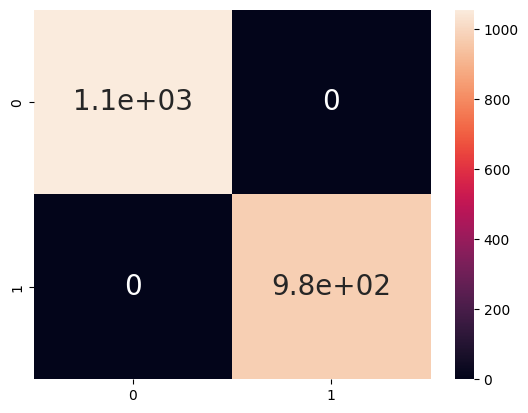

In [50]:
cm = confusion_matrix(y_correct, prediction)
sns.heatmap(cm, annot=True, annot_kws={"size": 20})

# №5
Перейдём к следующему датасэту.

На Землю нападают войска жукеров, и в их флоте присутствуют транспортники, истребители и крейсеры. Для борьбы с каждым типом кораблей используется свой вид оружия. Как аналитику из Штаба Обороны, вам поручено разработать модель, предсказывающую какие корабли участвуют в атаке, чтобы успешно отбить нападения на различные области планеты

Данных удалось собрать немного, и предсказывать придётся гораздо больший по объёму массив.

Обучите модель и предскажите классы кораблей для новых поступающих данных. Укажите в ответе через пробел число крейсеров, транспортников и истребителей.

От вашего ответа зависит судьба человечества!

In [52]:
invasion_df = pd.read_csv('../../../Datasets/invasion.csv')
information_df = pd.read_csv("../../../Datasets/operative_information.csv")
invasion_df.head()

,class,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
0,transport,2.190672,6.716633,62.168208,0.347465,158221,44.932446
1,transport,3.453276,8.995909,62.994707,0.590094,385972,41.568300
2,transport,2.432994,6.938691,62.245807,0.329288,446482,40.123467
3,fighter,6.083763,3.019459,18.474555,0.174738,210125,11.384865
4,fighter,12.876769,2.452950,195.805771,0.150446,23109,11.328806


In [54]:
X = invasion_df.drop(["class"], axis=1)
y = invasion_df["class"]

In [55]:
search.fit(X, y)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': range(1, 13, 2),
                         'min_samples_leaf': range(1, 8),
                         'min_samples_split': range(2, 10, 2),
                         'n_estimators': range(10, 51, 10)})

In [58]:
best_clf_rf = search.best_estimator_
prediction = best_clf_rf.predict(information_df)

array(['fighter', 'transport', 'transport', ..., 'transport', 'fighter',
       'transport'], dtype=object)

In [67]:
pd.Series(prediction).value_counts()

fighter      675
transport    595
cruiser      230
dtype: int64

# №6
Какая переменная оказалась самой важной для классифицирования кораблей?

In [69]:
feature_importances = best_clf_rf.feature_importances_
feature_importances_df = pd.DataFrame({
    "feature": list(X),
    "importance": feature_importances
})

feature_importances_df.sort_values("importance", ascending=False)

,feature,importance
3,brightness,0.363803
5,volume,0.257661
2,speed,0.171441
1,i_reflection,0.124372
0,g_reflection,0.082723
4,time_of_observance,0.000000


# №7
Благодаря вашим стараниям войска захватчиков были разгромлены, но война ещё не окончена! Вас повысили и перевели на новое направление (новые должности - новые задачи) - теперь нужно выявлять опасные регионы космоса, где могут находиться жукеры.

Проанализируйте имеющиеся данные об опасности разных регионов космоса и укажите наиболее вероятные причины угрозы:
- Близость к чёрной дыре сильно связана с опасностью - может быть инопланетяне как-то используют их (или находиться рядом с чёрной дырой не лучшая идея)
- Присутствие жукеров в системе - очевидный сигнал об опасности
- Наличие планемо увеличивает опасность - возможно жукеры строят свои базы на этих телах 

In [71]:
danger_space_df = pd.read_csv('../../../Datasets/space_can_be_a_dangerous_place.csv')
danger_space_df.head()

,r,phi,peradventure_index,dustiness,black_hole_is_near,buggers_were_noticed,nearby_system_has_planemo,dangerous
0,169.1,138.0,22.3212,0.706285,0,1,1,1
1,11.1,148.0,1.4652,-0.410512,1,1,1,1
2,274.6,201.0,36.2472,0.756457,1,1,1,1
3,172.8,173.0,22.8096,0.035221,1,1,1,1
4,223.3,222.0,29.4756,0.197271,0,1,1,1


In [72]:
X = danger_space_df.drop(["dangerous"], axis=1)
y = danger_space_df.dangerous

In [73]:
search.fit(X, y)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': range(1, 13, 2),
                         'min_samples_leaf': range(1, 8),
                         'min_samples_split': range(2, 10, 2),
                         'n_estimators': range(10, 51, 10)})

In [74]:
best_clf_rf = search.best_estimator_
feature_importances = best_clf_rf.feature_importances_

In [75]:
feature_importances_df = pd.DataFrame({
    "feature": list(X),
    "importance": feature_importances
})

feature_importances_df.sort_values("importance", ascending=False)

,feature,importance
5,buggers_were_noticed,0.526867
6,nearby_system_has_planemo,0.429539
4,black_hole_is_near,0.014486
3,dustiness,0.008786
0,r,0.007039
2,peradventure_index,0.007015
1,phi,0.006268
